# ADVANCED visualization tools for python

**Disclaimer**: Remember that this part is outside the course syllabus and provides additional tools for those who want to expand their knowledge of python but is not necessary for the purpose of passing the course. Therefore, proceed only if you feel confident with what has been introduced so far.

If you decided to continue:

**Seaborn** is an advanced libarary that creates more appealing visualization. It is built on top of Matplotlib and requires less coding to plot decent figures, but it's less configurable. Useful link: <a href="http://seaborn.pydata.org/tutorial.html">documentation</a>.

On top of that, some common and important types of plots will be introduced (sec. 1.3).

### 1.2 Seaborn

Normally, seaborn works together with pandas dataframe because of easy data manipulation.

If you're continuing this tutorial between Lab3 and Lab4, you have not encountered Pandas yet (spoiler: it's covered in Lab4). In brief, Pandas is a Python library for handling and analyzing data. For now, think of it as a dictionary where the keys are column names, and the values are numpy arrays or simply lists.

However, seaborn also work with matplotlib to plot with matplotlib figures.

In [1]:
# First, import the necessary libraries. 
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd

# If the previous cell outputs one of the following errors: `ModuleNotFoundError: No module named 'seaborn` or `ModuleNotFoundError: No module named 'pandas`, then, you have to install them. 
# If you don't remember how to install a Python package, please retrieve the guide on Anaconda-Navigator.

# To install **seaborn** you can use one of the following commands from the terminal of your virtual environment: 
# `conda install seaborn`
# `pip install seaborn`

# To install **matplotlib** you can use one of the following commands from the terminal of your virtual environment:
# `conda install pandas`
# `pip install pandas`

### 1.2.1 Basic Usage

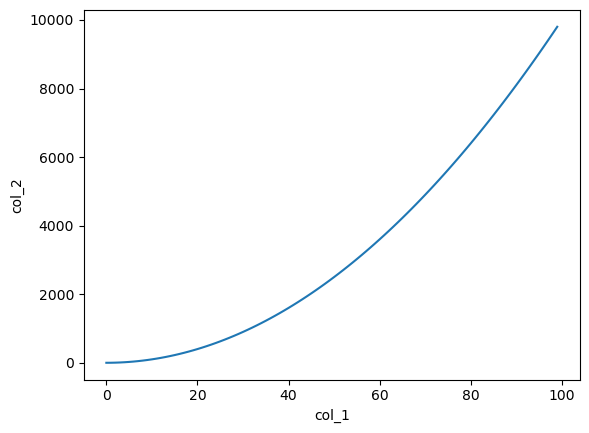

In [2]:
# a simple example to show how you can combine everything together
# refer to http://seaborn.pydata.org/generated/seaborn.lineplot.html?highlight=lineplot#seaborn.lineplot

# create a simple dataframe
x = [i for i in range(100)] # one column of number from 0 to 99
y = [i**2 for i in x] # another column is the square of the previous column
df = pd.DataFrame({
    'col_1' : x, 
    'col_2' : y
})

plt.figure()
sns.lineplot(
    data = df, # which dataframe you want to use as the source data
    x = 'col_1', # which column to use for x-axis
    y = 'col_2', # which column to use for y-axis
    # ax = plt.gca() # assign this plot to current axis, not mandatory in this case
)
plt.show()

### 1.2.2 Advanced usage of seaborn

To continue you need to install the scikit-learn library. Run one of this two commands from the terminal of your virtual environment or use the Anaconda-Navigator.

- `conda install scikit-learn`
- `pip install scikit-learn`


In [3]:
# in this case, we use a predefined dataset as an example
# load dataset of IRIS flowers, which include the information (4 properties) of three types of flowers
from sklearn import datasets
iris_data = datasets.load_iris()
df_iris = pd.DataFrame(iris_data.data, columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
df_iris['type'] = 'setosa'
df_iris.loc[50:99, 'type'] = 'versicolor'
df_iris.loc[100:149, 'type'] = 'virginica'
df_iris

,sepal_length,sepal_width,petal_length,petal_width,type
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<Axes: xlabel='petal_length', ylabel='petal_width'>

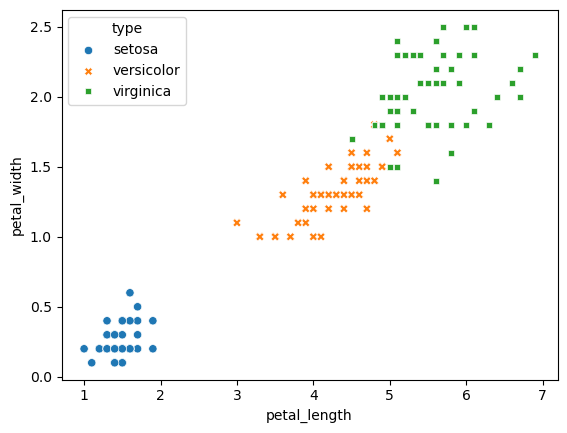

In [4]:
# scatter plot of sepal length and width
# refer to http://seaborn.pydata.org/generated/seaborn.scatterplot.html?highlight=scatter#seaborn.scatterplot
# the assignment of different properties (color, label, ...) is done automatically

sns.scatterplot(
    data = df_iris,
    x = 'petal_length',
    y = 'petal_width',
    hue = 'type', # assign color to different flower types, the assigned colors are based on column 'type'
    style = 'type' # assign marker style to different flower types, the assigned styles are based on column 'type'
)

### 1.2.3 Introduction of density plot
Visualizing the density of data is crucial and necessary for almost every machine learning task with data processing. Density plot is a way to visualize the distribution of data, helping to understand the condition and context of different numerical values in the dataset. Here I introduce 3 typical density plots, i.e., **boxplot**, **distribution plot**, and **empirical cumulative distribution function (eCDF) plot**, that you can use to visualize the distribution in different ways.

- **Boxplot** is a visualization method that plots and divides the numerical values into different portions according their quartiles. A visual representation is in the following.
![](boxplot.png)
<br>Useful link: <a href="https://en.wikipedia.org/wiki/Box_plot">Wiki</a>, <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html#matplotlib.pyplot.boxplot">matplotlib</a>, 
<a href="http://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot">seaborn</a>.

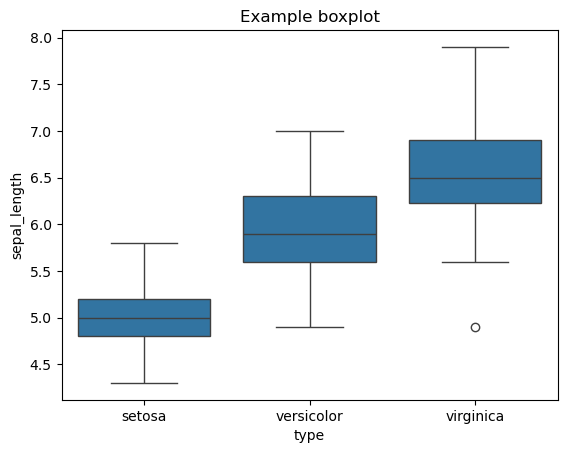

In [6]:
# create a single figure for sepal length with 3 boxplots for the three flowers 

plt.figure()
sns.boxplot(data=df_iris, x='type', y='sepal_length')
plt.title('Example boxplot')
plt.show()

- **Distribution plot** directly and visually assesses the distribution of data. It can be a histogram that describe the frequency of various numerical values or the density estimated by certain functions based on the data. Useful link: <a href="https://seaborn.pydata.org/generated/seaborn.displot.html">displot</a>, 
<a href="https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot">histplot</a>.

<Axes: xlabel='sepal_length', ylabel='Count'>

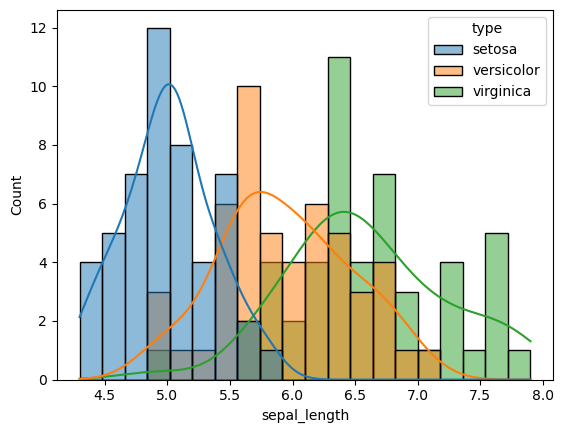

In [ ]:
# histgram of the samples in previous boxplot
sns.histplot( 
    data = df_iris, 
    x = "sepal_length", # the column you want to check
    hue = "type", # check the distribution of different flow types
    bins = 20,
    kde = True
)

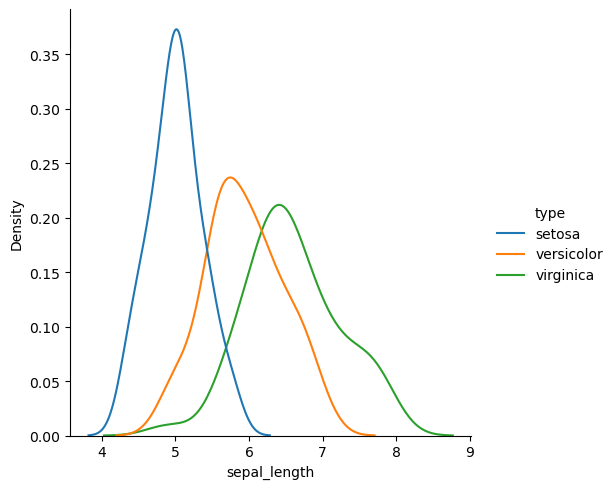

In [11]:
# distribution plot of the samples in previous boxplot
sns.displot(
    data = df_iris, 
    x = "sepal_length", # the column you want to check
    hue = "type", # check the distribution of different flow types
    kind = "kde" # a kernel density estimate (KDE) of the distribution, you can remove this to see the change
)

- **Empirical cumulative distribution function (eCDF)** is simply the cumulative count of data samples following a specific order. It is a step function that count the total number of samples that satisfy the current condition at current step. Useful link: <a href="https://en.wikipedia.org/wiki/Empirical_distribution_function">ECDF</a>, <a href="https://seaborn.pydata.org/generated/seaborn.ecdfplot.html?highlight=ecdfplot">seaborn</a>.

<Axes: xlabel='sepal_length', ylabel='Proportion'>

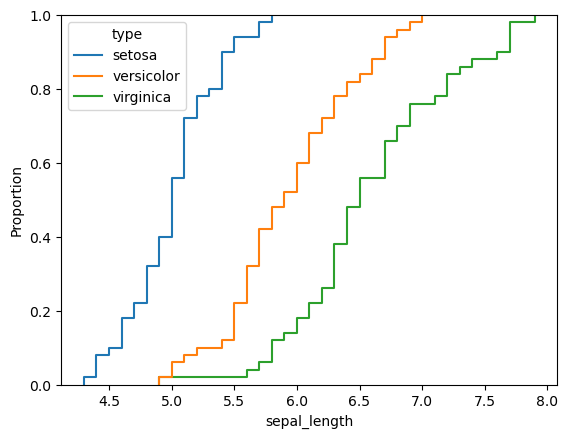

In [12]:
sns.ecdfplot(
    data = df_iris,
    x = 'sepal_length', # the column that you want to compute ecdf, they will be in the order from short to long length (numerical order)
    hue = 'type'
)

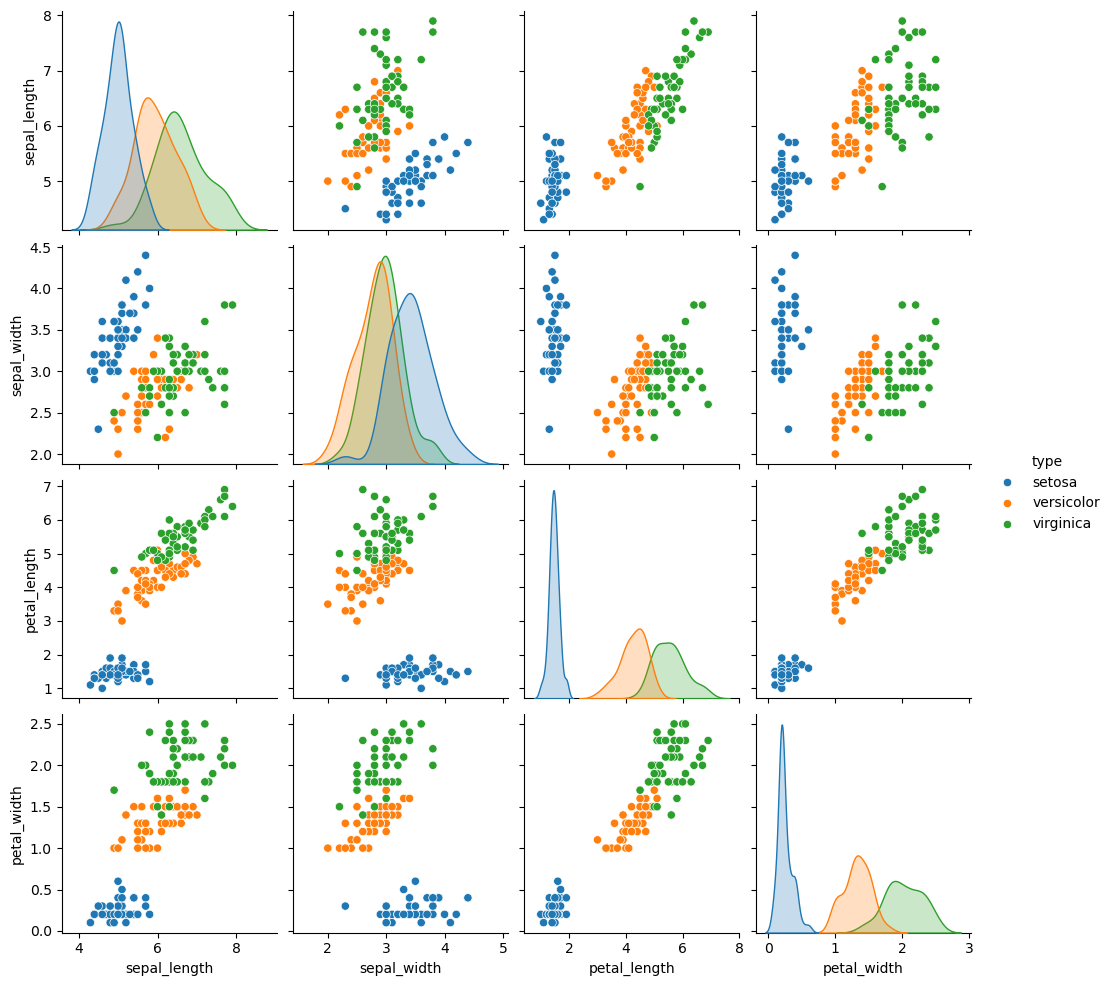

In [13]:
# another example of even more advanced usage that combine scatter plot and density plot 
# multidimensional relationships among the samples

sns.pairplot(df_iris, hue='type')

### 1.3 Pandas built-in functions
Pandas has its own built-in functions that integrate matplotlib to easily make plot. You can do many kinds of plots without data manipulation since data are already there in the dataframe, and can use it for quick visualization or combine with matplotlib and seaborn to make complex plot. Useful link: <a href="https://pandas.pydata.org/pandas-docs/stable/reference/plotting.html">documentation</a>.

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

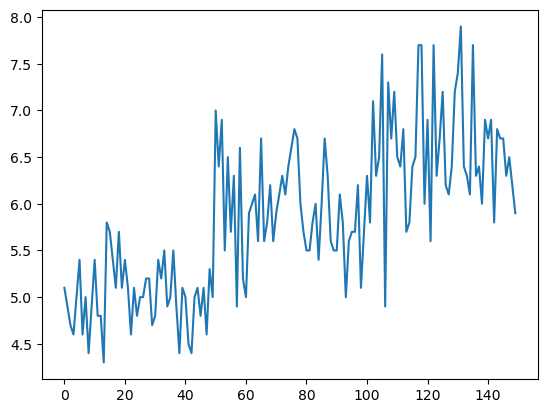

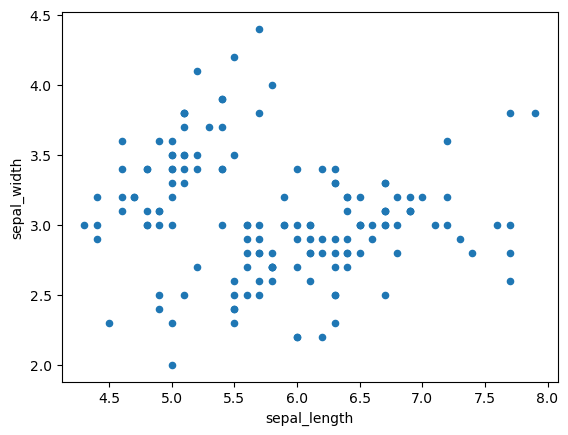

In [14]:
# two examples, only two lines of code

df_iris['sepal_length'].plot() # line plot, it's meaningless in this case
df_iris.plot.scatter('sepal_length', 'sepal_width') # scatter plot

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

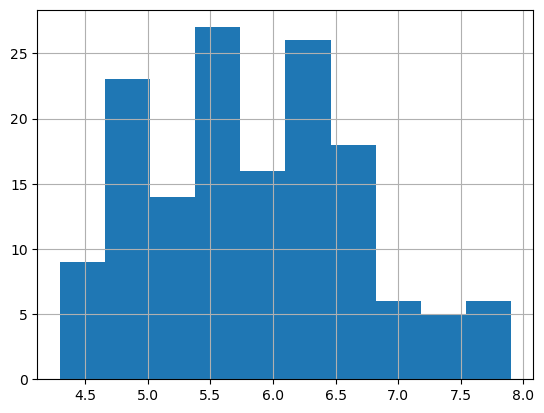

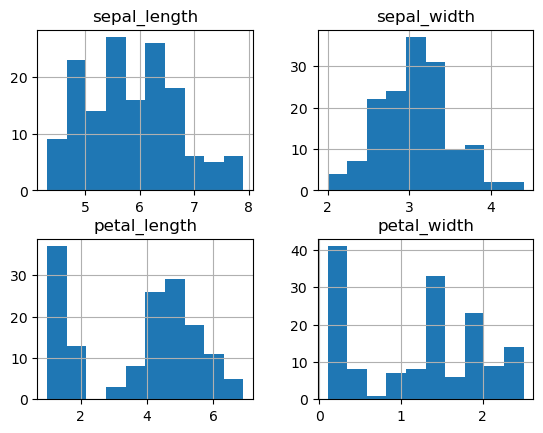

In [15]:
# example of the histogram of all sepal length regardless of the type of flowers, only 1 line of code
df_iris['sepal_length'].hist()

# example of the histogram of sepal length of each type of the flowers in the dataset, only 1 line of code
df_iris.hist()

# The first one is the histogram of a pandas series, while the second one is the histogram of the entire dataframe
# in this second case, the plot will choose all columns existed in the dataframe to visualize everything
# be careful that that in some complex dataframe, certain columns may not be feasible to plot